In [11]:
import torch
from matplotlib import pyplot as plt
from utils.plots import hdr_plot_style
from config import config_dataset
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
plt.rcParams['font.family'] = 'Times New Roman'

In [12]:
M = 20
X = torch.load("./data/load_test.pt").unsqueeze(1).repeat(1, M, 1)
X_hat_gan = torch.load("./result/data/load_hat_gan.pt")[:, :M, :]
X_hat_diff_base = torch.load("./result/data/load_hat_diff_base.pt")[:, :M, :]
X_hat_diff_phy = torch.load("./result/data/load_hat_diff_phy.pt")[:, :M, :]
X_hat_vae = torch.load("./result/data/load_hat_vae.pt")[:, :M, :]
X_hat_nf = torch.load("./result/data/load_hat_nf.pt")[:, :M, :]

/tmp/ipykernel_75745/2687782414.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X = torch.load("./data/load_test.pt").unsqueeze(1).repeat(1, M, 1)
/tmp/ipykernel_75745/2

In [13]:
X.shape, X_hat_diff_base.shape

(torch.Size([2190, 20, 96]), torch.Size([2190, 20, 96]))

In [14]:
def hm_err(X, X_hat, mean, label):
    t = torch.arange(96)/4
    err = torch.sqrt((X_hat - X) ** 2).mean(dim=0) if mean == True else torch.sqrt((X_hat - X) ** 2).var(dim=0)
    plt.plot(t, err, label = label)
    # sns.heatmap(err, cmap='cividis')

num_days = 73
def plot_err(id, mean=True):
    x = X[id*num_days:(id+1)*num_days].reshape(-1, 96)
    x_hat_gan = X_hat_gan[id*num_days:(id+1)*num_days, :, :].reshape(-1, 96)
    x_hat_vae = X_hat_vae[id*num_days:(id+1)*num_days, :, :].reshape(-1, 96)
    x_hat_nf = X_hat_nf[id*num_days:(id+1)*num_days, :, :].reshape(-1, 96)
    x_hat_diff_base = X_hat_diff_base[id*num_days:(id+1)*num_days, :, :].reshape(-1, 96)
    x_hat_diff_phy = X_hat_diff_phy[id*num_days:(id+1)*num_days, :, :].reshape(-1, 96)
    hm_err(x, x_hat_gan, mean, label = "GAN")
    hm_err(x, x_hat_vae, mean, label = "VAE")
    hm_err(x, x_hat_nf, mean, label = "NF")
    hm_err(x, x_hat_diff_base, mean, label = "BDM")
    hm_err(x, x_hat_diff_phy, mean, label = "PDM")
    

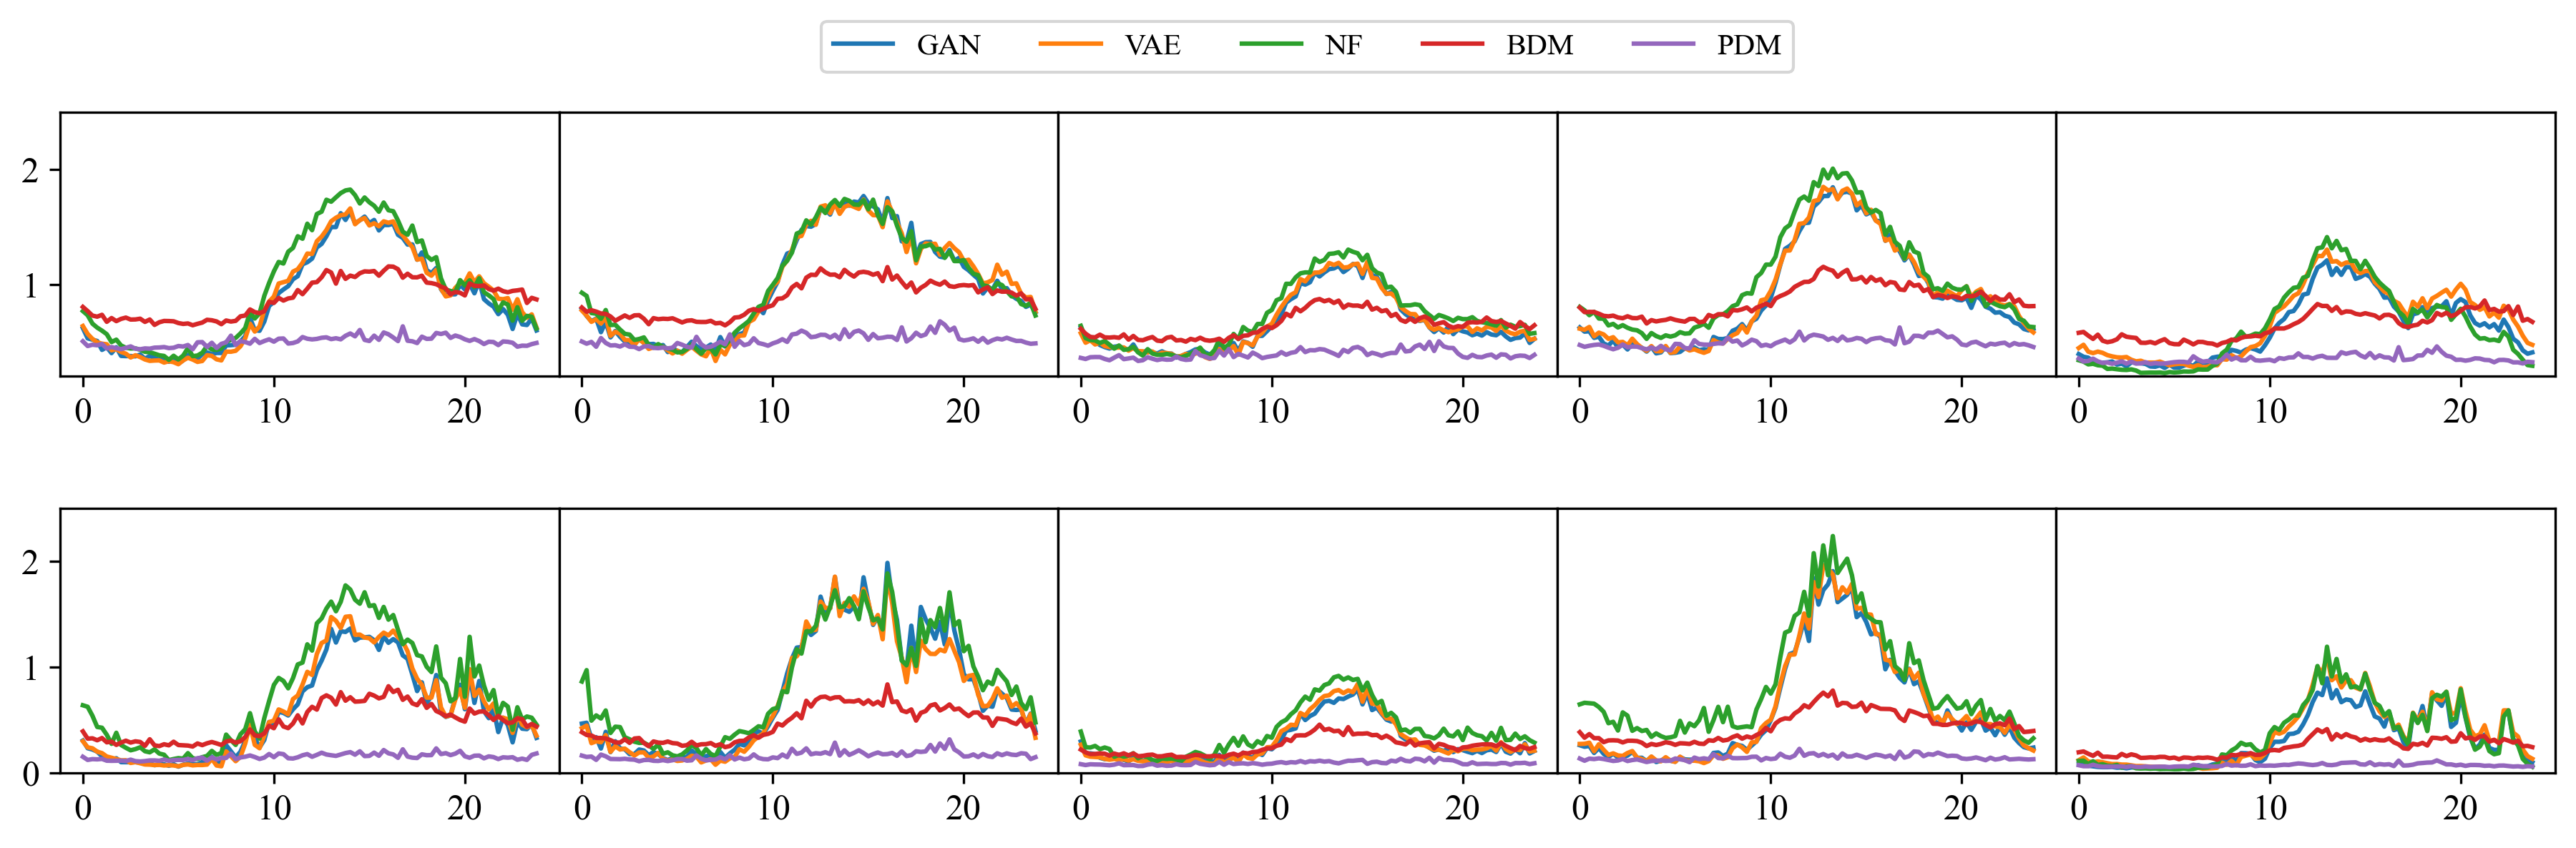

In [52]:
plt.figure(figsize=(15,4), dpi=300)
for i in range(5):
    plt.subplot(2,5,i+1)
    plot_err(i, True)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.ylim(0.2, 2.5)
    if i >0:
        plt.yticks([]) 

# plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(5):
    plt.subplot(2,5,i+6)
    plot_err(i, False)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.ylim(0, 2.5)
    if i >0:
        plt.yticks([]) 
plt.legend(loc='upper center', bbox_to_anchor=(-1.5, 2.9), ncol=5)
plt.subplots_adjust(wspace=0, hspace=0.5)
# plt.subplots_adjust(hspace=0.7)  # Adjust vertical spacing

plt.savefig("./result/plots/mean.jpg")